# EDA Project - Superstore Sales Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/LillianPierson/Python-for-Data-Science/blob/master/Superstore-Sales.csv?raw=true',encoding = 'unicode_escape')

pd.set_option('display.max_column',None ,'display.max_colwidth',None)
df.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
1,49,293,10/1/2012,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",Jumbo Drum,0.58,10/2/2012


In [3]:
print('Shape : ',df.shape)

Shape :  (8399, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                8399 non-null   int64  
 1   Order ID              8399 non-null   int64  
 2   Order Date            8399 non-null   object 
 3   Order Priority        8399 non-null   object 
 4   Order Quantity        8399 non-null   int64  
 5   Sales                 8399 non-null   float64
 6   Discount              8399 non-null   float64
 7   Ship Mode             8399 non-null   object 
 8   Profit                8399 non-null   float64
 9   Unit Price            8399 non-null   float64
 10  Shipping Cost         8399 non-null   float64
 11  Customer Name         8399 non-null   object 
 12  Province              8399 non-null   object 
 13  Region                8399 non-null   object 
 14  Customer Segment      8399 non-null   object 
 15  Product Category     

In [5]:
df.isnull().sum()

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

In [6]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace = True)

In [7]:
df.isnull().sum()

Row ID                  0
Order ID                0
Order Date              0
Order Priority          0
Order Quantity          0
Sales                   0
Discount                0
Ship Mode               0
Profit                  0
Unit Price              0
Shipping Cost           0
Customer Name           0
Province                0
Region                  0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Name            0
Product Container       0
Product Base Margin     0
Ship Date               0
dtype: int64

# Order Priority

In [8]:
df['Order Priority'].value_counts()

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order Priority, dtype: int64

In [9]:
df['Order Priority'].unique()

array(['Low', 'High', 'Not Specified', 'Medium', 'Critical'], dtype=object)

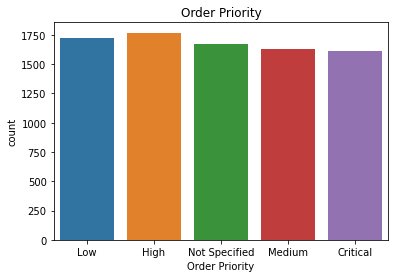

In [10]:
# plt.figure(figsize=(4,3))

sns.countplot(data=df,x='Order Priority')
plt.title('Order Priority')
plt.show()

# Shipping Mode

In [11]:
df['Ship Mode'].value_counts()

Regular Air       6270
Delivery Truck    1146
Express Air        983
Name: Ship Mode, dtype: int64

In [12]:
df['Ship Mode'].value_counts().index

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object')

In [13]:
df['Ship Mode'].value_counts().values

array([6270, 1146,  983], dtype=int64)

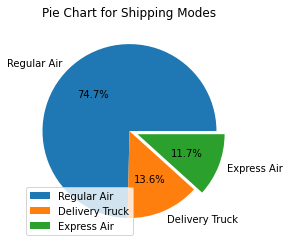

In [14]:
explode = (0, 0, 0.1)

plt.pie(x=df['Ship Mode'].value_counts().values, 
        labels=df['Ship Mode'].value_counts().index,
        explode = explode,
        autopct='%1.1f%%'
       )
plt.title('Pie Chart for Shipping Modes')
plt.legend(loc = 3)
plt.show()

# Shipping Mode according to Product Category

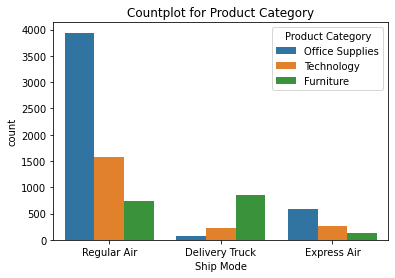

In [15]:
sns.countplot(data=df,x='Ship Mode',hue='Product Category')
# plt.legend(title= 'Custome title for legend')

plt.title('Countplot for Product Category')
plt.show()

# Customer Segment

In [16]:
df['Customer Segment'].value_counts()

Corporate         3076
Home Office       2032
Consumer          1649
Small Business    1642
Name: Customer Segment, dtype: int64

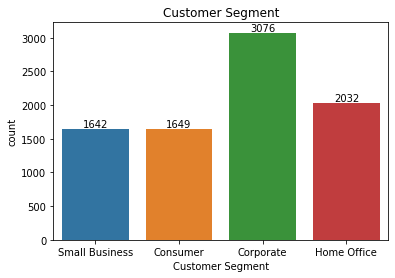

In [17]:
# plt.figure(figsize=(4,3))

ax = sns.countplot(data=df,x='Customer Segment')
for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Customer Segment')

plt.show()

# Product Category

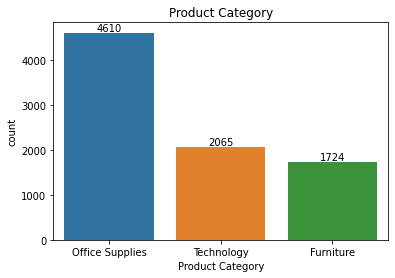

In [18]:
# plt.figure(figsize=(4,3))

ax = sns.countplot(data=df,x='Product Category')
for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Product Category')

plt.show()

#  Product Subcategory

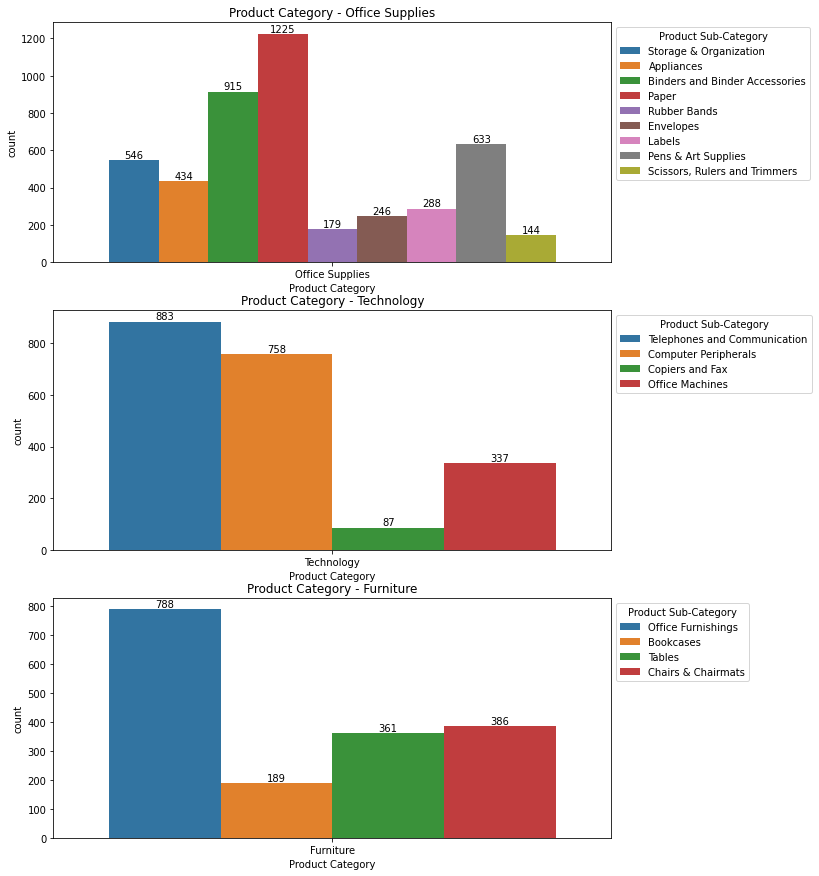

In [63]:
# using subplot 
 
plt.figure(figsize=(10, 15))

# First subplot
plt.subplot(3, 1, 1)
ax = sns.countplot(data=df[df['Product Category'] == 'Office Supplies'], x='Product Category', hue='Product Sub-Category')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Product Category - Office Supplies')
ax.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))


# Second subplot
plt.subplot(3, 1, 2)
ax = sns.countplot(data=df[df['Product Category'] == 'Technology'], x='Product Category', hue='Product Sub-Category')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Product Category - Technology')
ax.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))


# Third subplot
plt.subplot(3, 1, 3)
ax = sns.countplot(data=df[df['Product Category'] == 'Furniture'], x='Product Category', hue='Product Sub-Category')
for bar in ax.containers:
    ax.bar_label(bar)
plt.title('Product Category - Furniture')
ax.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


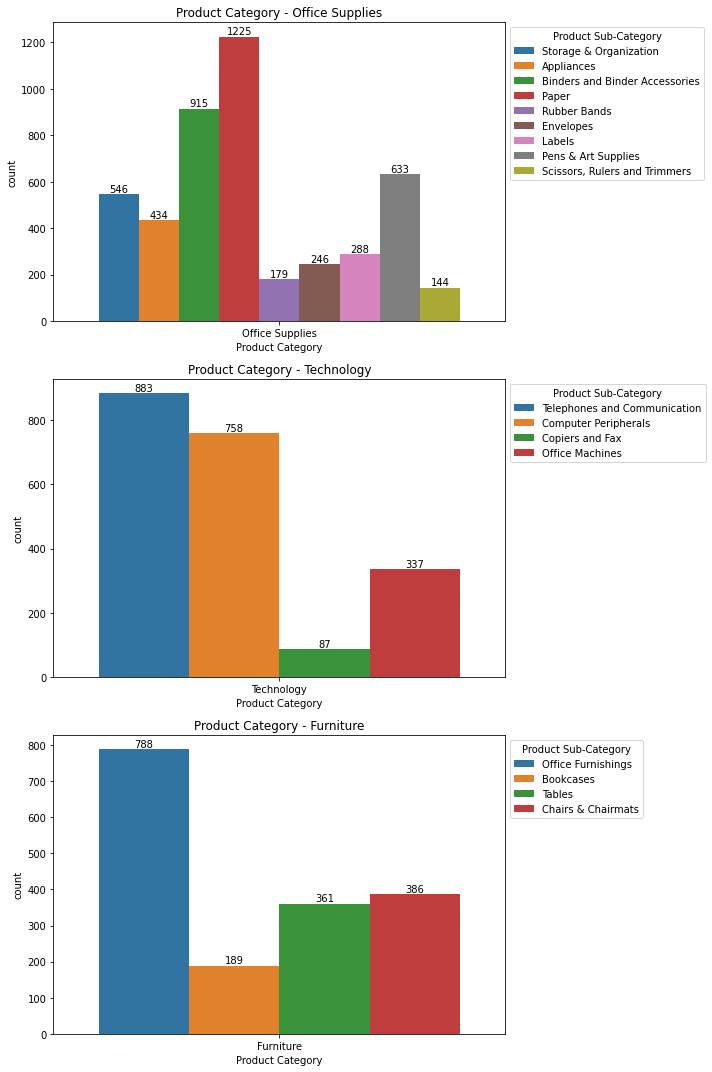

In [59]:
# using subplots

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# First subplot for Office Supplies
ax1 = sns.countplot(data=df[df['Product Category'] == 'Office Supplies'], x='Product Category', hue='Product Sub-Category', ax=axes[0])
for bar in ax1.containers:
    ax1.bar_label(bar)
ax1.set_title('Product Category - Office Supplies')
ax1.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

# Second subplot for Technology
ax2 = sns.countplot(data=df[df['Product Category'] == 'Technology'], x='Product Category', hue='Product Sub-Category', ax=axes[1])
for bar in ax2.containers:
    ax2.bar_label(bar)
ax2.set_title('Product Category - Technology')
ax2.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

# Third subplot for Furniture
ax3 = sns.countplot(data=df[df['Product Category'] == 'Furniture'], x='Product Category', hue='Product Sub-Category', ax=axes[2])
for bar in ax3.containers:
    ax3.bar_label(bar)
ax3.set_title('Product Category - Furniture')
ax3.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


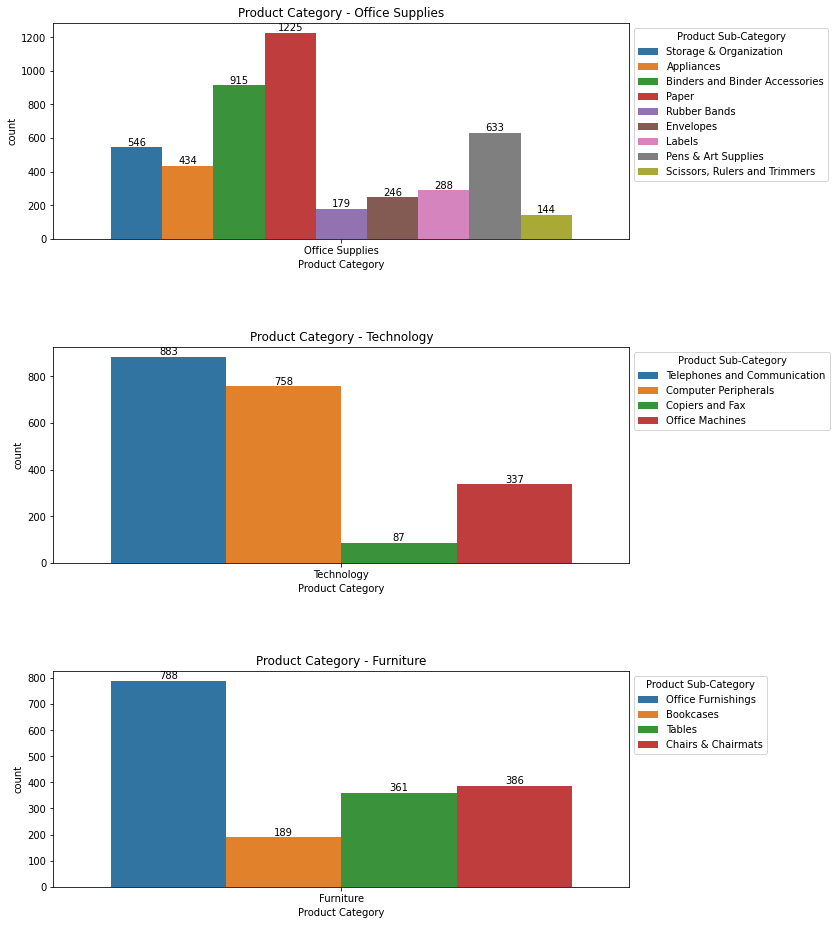

In [60]:
# using fig.add_axes approach

fig = plt.figure(figsize=(10, 15))

# First subplot for Office Supplies
ax1 = fig.add_axes([0.1, 0.65, 0.8, 0.2])  # [left, bottom, width, height]
sns.countplot(data=df[df['Product Category'] == 'Office Supplies'], x='Product Category', hue='Product Sub-Category', ax=ax1)
for bar in ax1.containers:
    ax1.bar_label(bar)
ax1.set_title('Product Category - Office Supplies')
ax1.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

# Second subplot for Technology
ax2 = fig.add_axes([0.1, 0.35, 0.8, 0.2])
sns.countplot(data=df[df['Product Category'] == 'Technology'], x='Product Category', hue='Product Sub-Category', ax=ax2)
for bar in ax2.containers:
    ax2.bar_label(bar)
ax2.set_title('Product Category - Technology')
ax2.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

# Third subplot for Furniture
ax3 = fig.add_axes([0.1, 0.05, 0.8, 0.2])
sns.countplot(data=df[df['Product Category'] == 'Furniture'], x='Product Category', hue='Product Sub-Category', ax=ax3)
for bar in ax3.containers:
    ax3.bar_label(bar)
ax3.set_title('Product Category - Furniture')
ax3.legend(title='Product Sub-Category', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


# Date Format

In [75]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%m/%d/%Y')
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%m/%d/%Y')
df[['Ship Date','Order Date']]

,Ship Date,Order Date
0,2010-10-20,2010-10-13
1,2012-10-02,2012-10-01
2,2012-10-03,2012-10-01
3,2011-07-12,2011-07-10
4,2010-08-30,2010-08-28
...,...,...
8394,2010-08-09,2010-08-09
8395,2010-08-11,2010-08-09
8396,2011-04-10,2011-04-08
8397,2011-04-09,2011-04-08


In [78]:
df[['Ship Date','Order Date']].dtypes

Ship Date     datetime64[ns]
Order Date    datetime64[ns]
dtype: object

In [85]:
import datetime as dt

df['Order Year'] = df['Order Date'].dt.year

In [80]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Order Year'],
      dtype='object')

In [87]:
df['Order Year'].value_counts().reset_index()

,index,Order Year
0,2009,2153
1,2010,2142
2,2012,2102
3,2011,2002


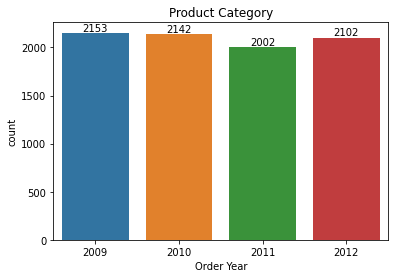

In [88]:
# plt.figure(figsize=(4,3))

ax = sns.countplot(data=df,x='Order Year')
for bar in ax.containers:
    ax.bar_label(bar)
    
plt.title('Order Year')

plt.show()

# Product Category wise profit

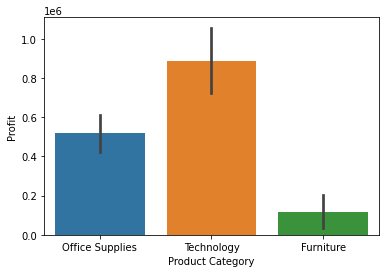

In [95]:
sns.barplot(data=df,x='Product Category',y='Profit',estimator='sum')
plt.show()